<a href="https://colab.research.google.com/github/pauloigorms/covid-twitter-pecd/blob/main/Programacao_Ciencia_Dados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PROGRAMAÇÃO PARA CIÊNCIA DE DADOS**

**Equipe**: Cássio de Paula / Paulo Moraes [(website)](https://paulomoraes.me).

**Objetivo**: analisar as mensagens
trocadas por usuários do Twitter sobre a COVID-19, com o intuito de realizar uma análise
exploratória e visualização de dados, passando também pelas etapas de limpeza e organização.
Mais especificamente, as equipes devem explorar a análise nas perguntas (questões) dos usuários,
pois arguimos que seja um tipo de mensagem apropriado para se compreender as principais dúvidas
das pessoas sobre a atual pandemia.


# **INFORMAÇÕES GERAIS**

### **ARTEFATOS**


*   Relatório Técnico - *Um notebook com o texto e o código-fonte apresentado na ferramenta Google COLAB*; 
*   Repositório no GitHub.


### **ATIVIDADES**


*   Importar base de dados;
*   Tratar base de dados;
*   Identificar as perguntas (questões) descritas nas mensagens;
*   Salvar coleção com a identificação das perguntas em um novo dataset chamado "DuvidasDB".


### **DO RESULTADO**


1.   Devem apresentar um resumo (sumário) com as estatísticas dos dados originais, elas podem ser apresentadas através de tabelas e/ou gráficos;
2.   Com a coleção resultando da identificação das perguntas a equipe deve apresentar as estatísticas sobre estes dados.


### **TEMAS DISCUTIDOS**

As equipes devem fazer uma análise sobre os temas que são debatidos nas perguntas dos postadas pelos usuários. Faça uma análise se as perguntas são relativas aos seguintes temas:

*   Doença. Quando a pergunta é relativa à doença Deve-se observar que a doença é identificada por vários nomes. Exemplo: coronavírus, corona, COVID-19, etc;
*   Medicamento. Quando a pergunta é sobre o uso de determinado medicamento no tratamento da doença;
*   Organizações. Quando a pergunta é relativa a uma determinada entidade ou organização. Emissora de TV, Ministério da Saúde ou empresas são exemplos de organizações;
*   Pessoas. Quando a pergunta é sobre determinada pessoa. Por exemplo, a pergunta pode ser sobre a atuação que determinado político ou pessoa famosa teve durante esse período de pandemia.

# **VISÃO DOS DADOS**

> **Visão Temporal** - Deve-se fazer uma análise temporal das perguntas que formam o dataset *DuvidasDB*. Pode-se considerar o intervalo temporal de dias, semanas ou meses. A escolha do intervalo de tempo ficará a cargo das equipes. Exemplos de análise temporal: a) houve um aumento no número de perguntas
ao longo do tempo? b) houve uma mudança no perfil das perguntas ao longo do tempo?

> **Visão Geográfica** - Deve-se fazer uma análise geográfica (espacial) das perguntas que formam o dataset *DuvidasDB*. Existem algumas colunas no dataset que trazem a informação das localizações como, por exemplo, o país, estado e cidade. Em alguns tuítes é possível ainda identificar as coordenadas geográficas
de latitude e longitude. Exemplo de análise geográfica: a) os usuários de regiões diferentes fazem
perguntas com diferentes focos? Por exemplo, será que os usuários de uma região perguntam mais
sobre a doença ou sobre o tratamento? Essa análise ainda pode ser realizada em diversos níveis de
área (cidade, estado ou região). Além de apresentar a distribuição das dúvidas dos usuários por
região, a equipe deverá fazer uma análise dessa distribuição. Por exemplo, apresentar as razões
(ou hipóteses) da ocorrência dessa distribuição.


# **INICIANDO O PROJETO**

IMPORTANDO LIBS

In [161]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive

import nltk as nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords

nltk.download('rslp')

from sklearn.feature_extraction.text import TfidfVectorizer
from wordcloud import WordCloud, ImageColorGenerator

import re as rexpression
from string import punctuation
import unicodedata

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package rslp to /root/nltk_data...
[nltk_data]   Package rslp is already up-to-date!


LEITURA DO ARQUIVO DE DADOS BASE

In [ ]:
drive.mount('/content/drive')
load_data = pd.read_csv('drive/My Drive/twitter/dados-curso-completo.csv', sep= ',',skiprows=0, encoding='utf-8')
raw_data = load_data.drop_duplicates(['texto'])

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Funções

Função: **Cálcular Percente**

In [ ]:
def percentual(value, total): 
    if not value and not total: 
       return print("value = 0% \n total = 0%") 
    elif value < 0 or total < 0: 
       return print("não aceita valor negativo!") 
    else: 
       return '{0:.2f}%'.format((value / total * 100))

Função: **Formatar para configuração decimal**

In [ ]:
def decimaled(value):
  value = float('{:.3g}'.format(value))
  size = 0
  while abs(value) >= 1000:
    size += 1
    value /= 1000.0
  return '{}{}'.format('{:f}'.format(value).rstrip('0').rstrip('.'), ['', 'K', 'M', 'B', 'T'][size])

Função: **Remover pontuação**

In [95]:
def filtering(text):
  regex = rexpression.compile('[%s]' % rexpression.escape(punctuation))
  noponctuation = []
  words = text.split()
  for word in words:
    ntoken = regex.sub(u'', word)
    if not ntoken == u'':
      noponctuation.append(ntoken)
  return noponctuation

Função: **Remover acentuação**

In [154]:
def rm_accents(words):
  formated = []
  for item in words:    
    chars = [c for c in unicodedata.normalize('NFKD', item)]
    formated.append(u''.join([r for r in chars if not unicodedata.combining(r)]))
  return formated

Função: **Remover StopWords**

In [159]:
def rm_stopwords(text):
  swords = stopwords.words('portuguese')
  return [r for r in text if r.lower().strip() not in swords]  

Função: **Remover Tokens**

In [151]:
def tokenize(text):
  tclean = []
  for word in text:
    nfkd = unicodedata.normalize('NFKD', word)
    noaccent = u''.join([r for r in nfkd if not unicodedata.combining(r)])
    join = rexpression.sub('[^a-zA-Z \\\]',' ', noaccent)
    tclean.append(join.lower().strip())
  return ' '.join([r for r in tclean if len(r) > 1 and not r.isdigit()])

Função: **Reduzir as palavras ao seu radical**

In [124]:
def stemming(text):
  words = text.split()
  stm = []
  for word in words:
    stm.append(rslp.RSLPStemmer().stem(word))
  return (' '.join(stm))

Função: **Remover Palavras**

In [71]:
def no_grams(words):
  arr = words.split(' ')
  trigrams = []
  for r in range(0, len(words)):
      if(r == len(words)-2):
          break
      else:
          trigram = words[r]+'_'+words[r+1]+'_'+words[r+2]
          trigrams.append(trigram)
  return trigrams

#Estatísticas bases


**Exemplo da base de dados**

---



In [ ]:
raw_data.head(5)

,data,usuario,apelido,texto,retweet,seguidores,idioma,lugar,pais,sigla,latitude,longitude,hashtags
0,2020-03-23 18:51:14,Gaboardi,fraslee,@BolsonaroSP Cade o fundão deputado??? Congres...,0,138,pt,NaN,NaN,NaN,NaN,NaN,[]
1,2020-03-18 03:18:14,Seu Zé da Farmácia,seuzedafarmacia,"Em ação preventiva, o Governo do Estado suspen...",0,56,pt,NaN,NaN,NaN,NaN,NaN,[]
2,2020-03-29 12:09:27,Marília Oliveira 🇧🇷,Marioliveira_gb,Incrível como os defensores do fim do distanci...,0,5,pt,NaN,NaN,NaN,NaN,NaN,[]
3,2020-04-01 21:11:07,🚩,santosodeto,Fumaça de cigarro pode propagar coronavírus? h...,0,1885,pt,NaN,NaN,NaN,NaN,NaN,[]
4,2020-03-19 17:49:40,Nova Impressão,novaimpressao_,🚨Todos juntos contra COVID-19💪\n\nSolicite seu...,0,124,pt,Brasília,Brazil,BR,-47.8778,-15.77691,[]


**Tamanha da base (com e sem dados duplicados)**

---

In [ ]:
print("Total de dados (com duplicados): ", decimaled(load_data.texto.count()), " completo[", load_data.texto.count(), "]" )

Total de dados (com duplicados):  1.66M  completo[ 1658825 ]


In [ ]:
print("Total de dados (sem duplicados): ", decimaled(raw_data.texto.count()), " completo[", raw_data.texto.count(), "]" )

Total de dados (sem duplicados):  1.65M  completo[ 1653599 ]


**Twitters por região**

---

In [ ]:
print("Total de twitters com localização: ", decimaled(raw_data['lugar'].count()))

Total de twitters com localização:  74.4K


In [ ]:
print("Percentual em relação à base: ", percentual(value=raw_data['lugar'].count(), total=raw_data.texto.count()))

Percentual em relação à base:  4.50%


In [ ]:
raw_data[raw_data.pais == 'Brazil'].groupby('pais').count()

,data,usuario,apelido,texto,retweet,seguidores,idioma,lugar,sigla,latitude,longitude,hashtags
pais,,,,,,,,,,,,
Brazil,67034,67033,67034,67034,67034,67034,67034,67034,67034,7675,7675,67034


In [ ]:
raw_data[raw_data.pais == 'Brazil'].groupby(['pais', 'lugar']).count().tail(2)

data  usuario  apelido  ...  latitude  longitude  hashtags
pais   lugar                                  ...                               
Brazil Érico Cardoso     1        1        1  ...         1          1         1
       Óbidos            2        2        2  ...         0          0         2

[2 rows x 11 columns]

**Twitters por período**

---

In [ ]:
df_data = pd.DataFrame(raw_data)
df_data['data'] = pd.to_datetime(df_data['data'])
df_data.index = df_data['data']
df_data.drop('data', inplace=True, axis=1)

df_res = df_data.resample('M').count()
df_res.reset_index(inplace=True)

df_res

,data,usuario,apelido,texto,retweet,seguidores,idioma,lugar,pais,sigla,latitude,longitude,hashtags
0,2020-01-31,54388,54391,54391,54391,54391,54391,2177,2177,2177,80,80,54391
1,2020-02-29,109485,109489,109489,109489,109489,109489,4305,4305,4305,225,225,109489
2,2020-03-31,480112,480128,480128,480128,480128,480128,23487,23486,23484,2561,2561,480128
3,2020-04-30,469321,469334,469334,469334,469334,469334,21318,21317,21315,2516,2516,469334
4,2020-05-31,283219,283229,283229,283229,283229,283229,12780,12777,12777,1993,1993,283229
5,2020-06-30,257022,257027,257027,257027,257027,257027,10316,10316,10315,1345,1345,257027
6,2020-07-31,1,1,1,1,1,1,0,0,0,0,0,1


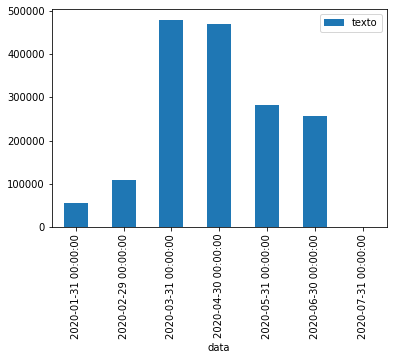

In [ ]:
df_res.plot(kind='bar',x='data',y='texto')

*Rascunho geral*

In [ ]:
from nltk.corpus import stopwords
from string import punctuation
stopwords = set(stopwords.words('portuguese') + list(punctuation))

#list(punctuation)

palavras_sem_stopwords = [palavra for palavra in sentencas if palavra not in stopwords]
palavras_sem_stopwords

#Pré-processamento

**Mineração de Perguntas**


In [ ]:
sent_tokenize(raw_data['texto'][7159]) # this gives us a list of sentences

*Mineração para Recuperação de Perguntas na Base*

Somente as perguntas

In [ ]:
valor = len(raw_data['texto'])

In [ ]:
twitter = []
perguntas = []
erro = []
for i in range(0, 100):
  try:
    twitter.append(sent_tokenize(raw_data[i]))   
    for sentencas in twitter: 
      for row in sentencas:
        palavras = word_tokenize(row.lower())
        for palavra in palavras:
          if palavra == '?':
            perguntas.append([row,i]) 
            break
    twitter.clear()
  except:
    erro.append(i)

Perguntas por twitter

In [ ]:
twitter = []
perguntas = []
erro = []
for i in range(0,100):
  try:
    twitter.append(sent_tokenize(raw_data['texto'][i]))   
    for sentencas in twitter: 
      flgPergunta = 0;
      for row in sentencas:
        palavras = word_tokenize(row.lower())
        for palavra in palavras:
          if palavra == '?':
            flgPergunta = 1;
            break
    if flgPergunta == 1:
      perguntas.append([raw_data['texto'][i],i,raw_data['texto'][i]])           
    twitter.clear()
  except:
    erro.append(i)

Resumo

In [54]:
print('Quantidade de registros que quebrariam a mineração: ', decimaled(len(erro)), 'completo[', len(erro), ']')

Quantidade de registros que quebrariam a mineração:  5.2K completo[ 5201 ]


In [56]:
print('Quantidade de perguntas extraída: ', decimaled(len(perguntas)), 'completo[', len(perguntas), ']')

Quantidade de perguntas extraída:  205K completo[ 205381 ]


**DataSet gerado para a análise**

In [59]:
df_DuvidasDB = pd.DataFrame(perguntas, columns=['Perguntas','Indice'])
# df_DuvidasDB.to_csv(r'drive/My Drive/twitter/duvidasdb.csv', index = False)
# df_DuvidasDB.head(1)
question = df_DuvidasDB.Perguntas[1]
questions = " ".join(twitter for twitter in df_DuvidasDB.Perguntas)

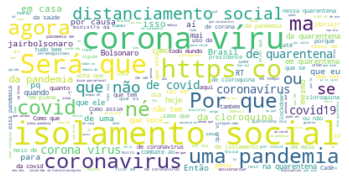

In [62]:
wordcloud = WordCloud(background_color="white").generate(questions)
plt.figure()
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# Processamento

In [76]:
short_data = df_DuvidasDB.head(5)

In [168]:
text_processed = []

for index, question in short_data.iterrows():
  item = filtering(question.Perguntas)
  item = rm_accents(item)
  item = rm_stopwords(item)
  item = tokenize(item)
  item = stemming(item)
  print(question.Perguntas)
  print(item)
  print('--------------------------------------------------')

@BolsonaroSP Cade o fundão deputado???
bolsonarosp cad funda deput
--------------------------------------------------
Fumaça de cigarro pode propagar coronavírus?
fumac cigarr pod propag coronaviru
--------------------------------------------------
@ipratesMD @dr_pampers Será que corremos o risco de termos piolhos super resistentes?
ipratesmd drpamp ser corr risc term piolh sup resist
--------------------------------------------------
Prioridade ?!
prior
--------------------------------------------------
Que tal uma notícia boa, indo na contramão do que a mídia corrupta está fazendo (tocando o terror na população)?
tal notic boa ind contrama mid corrupt faz toc terr populaca
--------------------------------------------------
